In [1]:
# Importing dependancies
import zipfile
import os
import pathlib
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Are we using a GPU? If not: go to Runtime -> Change runtime type -> Hardware accelerator: GPU
!nvidia-smi

Wed Oct 12 03:04:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Walkthrough
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/dental"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .'")

There are 2 directories and 0 images in '/content/drive/MyDrive/dental' .'
There are 0 directories and 92 images in '/content/drive/MyDrive/dental/lesion' .'
There are 0 directories and 24 images in '/content/drive/MyDrive/dental/normal' .'


In [5]:
data_dir = pathlib.Path("/content/drive/MyDrive/dental/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[:]
print(class_names)

['lesion' 'normal']


In [6]:
# Visualizing our data 
def view_random_image(target_dir, target_class):
  # Setup the target directory 
  target_folder = target_dir+target_class

  # Get a random image path 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image 

  return img

['108.png']
Image shape: (1150, 2780)


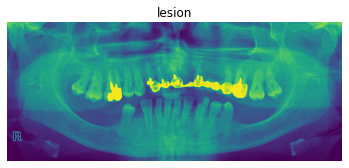

In [7]:
# Viewing a random image from train
img = view_random_image(target_dir="/content/drive/MyDrive/dental/",
                        target_class="lesion")

['105.png']
Image shape: (1200, 2800)
['25.png']
Image shape: (1150, 2850)


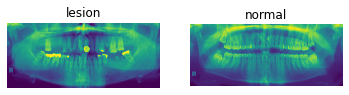

In [8]:
# Visualize both the data 
plt.figure()
plt.subplot(1, 2, 1)
normal = view_random_image("/content/drive/MyDrive/dental/", "lesion")
plt.subplot(1, 2, 2)
pneumonia = view_random_image("/content/drive/MyDrive/dental/", "normal")

In [9]:
# setup data inputs
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/dental/"
test_dir = "/content/drive/MyDrive/dental/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Train images :")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary")

print("Testing images :")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="binary")

Train images :
Found 116 images belonging to 2 classes.
Testing images :
Found 116 images belonging to 2 classes.


In [10]:
train_dir = "/content/drive/MyDrive/dental/"
test_dir = "/content/drive/MyDrive/dental/"

In [11]:
# Normalization 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)


Found 116 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


In [13]:
# Getting a sample of a train data batch
images, labels = train_data.next()  
len(images), len(labels)

(32, 32)

In [14]:
# Build a CNN model 
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [15]:
# Compiling the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [16]:
# seed  
tf.random.set_seed(42)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
4/4 [==============================] - 34s 6s/step - loss: 0.6049 - accuracy: 0.7328 - val_loss: 0.5480 - val_accuracy: 0.7931
Epoch 2/5
4/4 [==============================] - 11s 3s/step - loss: 0.5590 - accuracy: 0.7931 - val_loss: 0.5624 - val_accuracy: 0.7931
Epoch 3/5
4/4 [==============================] - 9s 3s/step - loss: 0.5340 - accuracy: 0.7931 - val_loss: 0.4822 - val_accuracy: 0.7931
Epoch 4/5
4/4 [==============================] - 9s 3s/step - loss: 0.4809 - accuracy: 0.7931 - val_loss: 0.5017 - val_accuracy: 0.7931
Epoch 5/5
4/4 [==============================] - 8s 2s/step - loss: 0.4814 - accuracy: 0.7931 - val_loss: 0.4587 - val_accuracy: 0.7931


In [17]:
# Plotting the valildation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss 
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

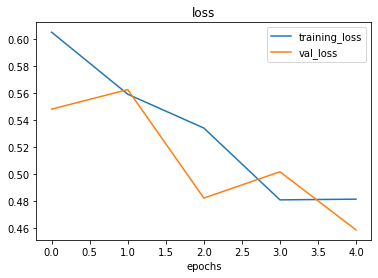

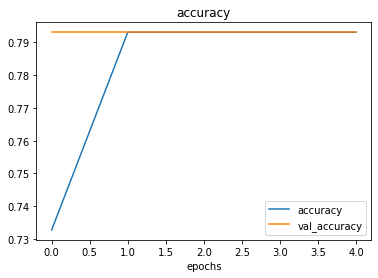

In [18]:
plot_loss_curves(history_1)

In [19]:
# function to import image and resize 
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape,, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image  
  img = tf.image.resize(img, size=IMAGE_SHAPE)
  #Grayscale
  img = tf.image.grayscale_to_rgb(img)
  # Rescale the image (getting all values between 0 & 1)
  img = img/255

  return img

In [20]:
def pred_and_plot(model, filename, class_names=["Lesion","Normal"]):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import target image and preprocess it 
  img = load_and_prep_image(filename)

  # Make a prediction 
  pred = model.predict(tf.expand_dims(img, axis=0))
  # pred = model.predict(tf.squeeze(img))

  # Get the predicted class 
  pred_class = class_names[int(tf.round(pred))]

  # Plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

In [21]:
model_1.save("/content/drive/MyDrive/lesion_CNN")

In [22]:
Xray_model =  tf.keras.models.load_model("/content/drive/MyDrive/lesion_CNN")

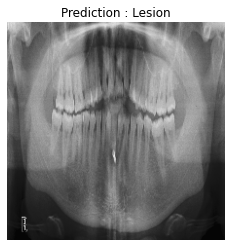

In [23]:
pred_and_plot(Xray_model,"/content/drive/MyDrive/dental/normal/76.png" )

pred: lesion, prob: 0.17
('lesion', 17.18)


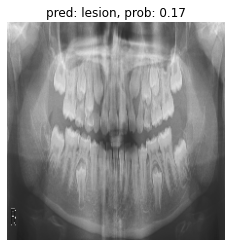

In [64]:

def load_and_prep_image(filename, img_shape=224, scale=True):
    """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image  
    img = tf.image.resize(img, size=IMAGE_SHAPE)
    #Grayscale
    img = tf.image.grayscale_to_rgb(img)
    # Rescale the image (getting all values between 0 & 1)
    img = img/255

    return img


def pred_and_plot(img, model_name):
    img = load_and_prep_image(img, scale=False)  # load in target image and turn it into tensor
    pred_prob = model_name.predict(tf.expand_dims(img, axis=0))  # make prediction on image with shape [None, 224, 224, 3]
    pred_class = class_names[pred_prob.argmax()]  # find the predicted class label
    print(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
    # # Plot the image with appropriate annotations
    plt.figure()
    plt.imshow(img)  # imshow() requires float inputs to be normalized
    plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
    
    plt.axis(False)
    confidence = round(100 * (pred_prob.max()), 2)
    return pred_class, confidence


img_path = "/content/drive/MyDrive/dental/normal/113.png"
print(pred_and_plot(img_path, Xray_model))

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

from PIL import Image
y_pred = model_1.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)

data= []
for x, y in test_data:
  print(y.shape)
  # basewidth = 300
  # img_pil = Image.fromarray(y)
  # wpercent = (basewidth / float(img_pil.size[0]))
  # hsize = int((float(img_pil.size[1]) * float(wpercent)))
  # img_pil = img_pil.resize((basewidth, hsize), Image.ANTIALIAS)
  # y = img_pil
  data.append(y)
  
y_true = np.concatenate(data, axis=0)

cr = classification_report(y_true, y_pred, output_dict=True, target_names=class_names)
pd.DataFrame.from_dict(cr)

In [ ]:
from sklearn.metrics import accuracy_score

def class_accuracy(class_no):
  pred_filter = y_true==class_no
  acc = accuracy_score(y_true[pred_filter], y_pred[pred_filter])
  return acc

{class_name: class_accuracy(i) for i, class_name in enumerate(class_names)}

In [ ]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_true,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(8, 8),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
from IPython import display
report = classification_report(y_true, y_pred, target_names=class_names, digits=4,  output_dict=True)

display.display(pd.DataFrame(report))
df = pd.DataFrame(report)
df.iloc[:3, :3].T.plot(kind='bar')
plt.show()
plt.savefig("stats_CNN.png")

from google.colab import files

df.to_csv('stats_CNN.csv', encoding = 'utf-8-sig') 
# files.download('stats_CNN.csv')

In [28]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [29]:
! wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
# Importing dependancies
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import plot_loss_curves, compare_historys, make_confusion_matrix, unzip_data, walk_through_dir

--2022-10-12 03:28:29--  https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2022-10-12 03:28:30 (116 MB/s) - ‘helper_functions.py’ saved [10139/10139]



In [30]:
walk_through_dir("/content/drive/MyDrive/dental")

There are 2 directories and 0 images in '/content/drive/MyDrive/dental'.
There are 0 directories and 92 images in '/content/drive/MyDrive/dental/lesion'.
There are 0 directories and 24 images in '/content/drive/MyDrive/dental/normal'.


In [31]:
train_path='/content/drive/MyDrive/dental'
test_path='/content/drive/MyDrive/dental'
val_path='/content/drive/MyDrive/dental'

normal, lesion = [], []
arr = ["lesion", "normal"]

for elem in os.listdir( '/content/drive/MyDrive/dental/normal'):
  path =  '/content/drive/MyDrive/dental/normal/' + elem
  normal.append(path)

for elem in os.listdir('/content/drive/MyDrive/dental/lesion'):
  path = '/content/drive/MyDrive/dental/lesion/' + elem
  lesion.append(path)

len(normal), len(lesion)

(24, 92)

In [61]:
# Function to load and preprocess an image
IMG_SIZE = (224, 224)

def load_and_prep(filepath):
  img = tf.io.read_file(filepath)
    # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image  
  img = tf.image.resize(img, size=IMAGE_SHAPE)
  #Grayscale
  img = tf.image.grayscale_to_rgb(img)
  # Rescale the image (getting all values between 0 & 1)
  img = img/255

  return img

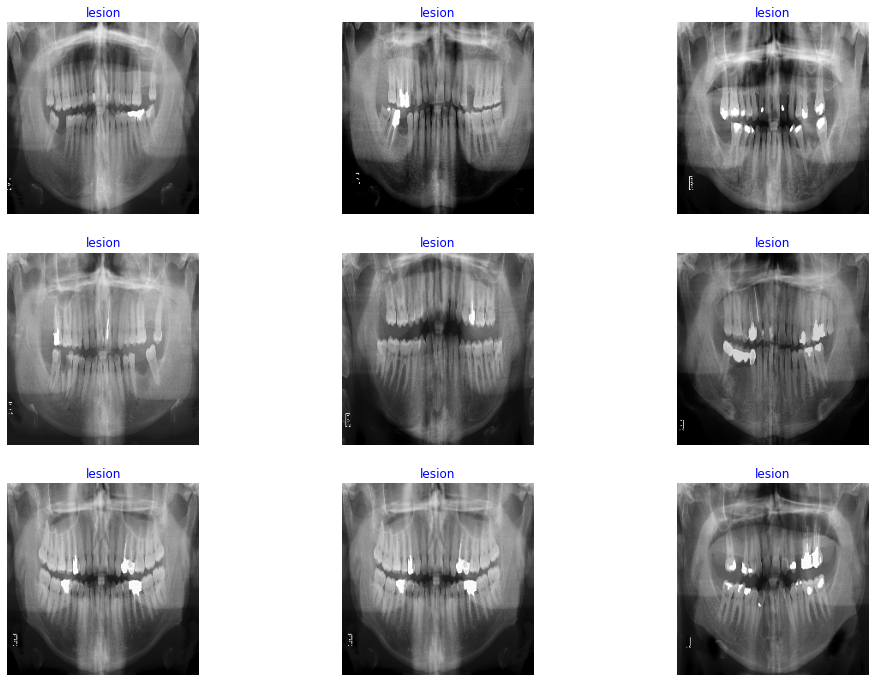

In [63]:
# Randomly visualizing multiple images of glioma_tumor
plt.figure(figsize=(17, 12))
for i in range(9):
  filepath = random.choice(lesion)
  img = load_and_prep(filepath)
  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title("lesion", color="blue")
  plt.axis(False);

In [65]:
# Merging the data 
total_arr = normal
total_arr.extend(lesion)

len(total_arr)

208

In [66]:
# getting the true labels of all samples in a single array
classes = []
for elem in total_arr:
  classes.append(elem.split("/")[5])

In [67]:
# Check for equality
len(total_arr), len(classes)

(208, 208)

In [68]:
# Generating a dataframe
df = pd.DataFrame({"filepath": total_arr,
                   "label": classes})
len(df)

208

In [69]:
# Splitting into training and validation set
train_df, val_df = train_test_split(df,
                                    test_size=0.15, 
                                    random_state=42)

len(train_df), len(val_df)

(176, 32)

In [70]:
# Image generator
train_data_gen = ImageDataGenerator()
val_data_gen = ImageDataGenerator()

In [71]:
# Generating training dataset
train_data = train_data_gen.flow_from_dataframe(train_df,
                                                x_col="filepath",
                                                y_col="label",
                                                target_size=IMG_SIZE,
                                                seed=42)

# Generating validation dataset
val_data = val_data_gen.flow_from_dataframe(val_df,
                                            x_col="filepath",
                                            y_col="label",
                                            target_size=IMG_SIZE,
                                            seed=42,
                                            shuffle=False)

Found 176 validated image filenames belonging to 2 classes.
Found 32 validated image filenames belonging to 2 classes.


In [72]:
# Generating class names
class_names = [elem for elem in train_data.class_indices.keys()]
class_names

['lesion', 'normal']

In [73]:
label_val = []
for elem in val_data.filepaths:
  for cl in range(len(class_names)):
    if elem.split("/")[5] == class_names[cl]:
      label_val.append(cl)

In [74]:
def gen_data(data):
  IMG_SIZE = (224, 224)
  img_arr, img_label_arr = [], []
  for img_path in data.filepaths:
    img = tf.io.read_file(img_path)
    label = img_path.split("/")[5]
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, IMG_SIZE)
    img_arr.append(img/255)
    img_label_arr.append(class_names.index(label))

  return np.array(img_arr), np.array(img_label_arr)

In [75]:
x_train, y_train = gen_data(train_data)
x_test, y_test = gen_data(val_data)

In [76]:
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train2, y_train)

KNeighborsClassifier(n_neighbors=2)

In [78]:
y_train_knn = knn.predict(x_train2)
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(y_train_knn,y_train)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9090909090909091


In [79]:
from sklearn.metrics import accuracy_score
y_pred_knn = knn.predict(x_test2)
testing_data_accuracy = accuracy_score(y_pred_knn,y_test)
print('Accuracy score of testing data : ', testing_data_accuracy)
print(classification_report(y_pred_knn,y_test))

Accuracy score of testing data :  0.875
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.00      0.00      0.00         0

    accuracy                           0.88        32
   macro avg       0.50      0.44      0.47        32
weighted avg       1.00      0.88      0.93        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


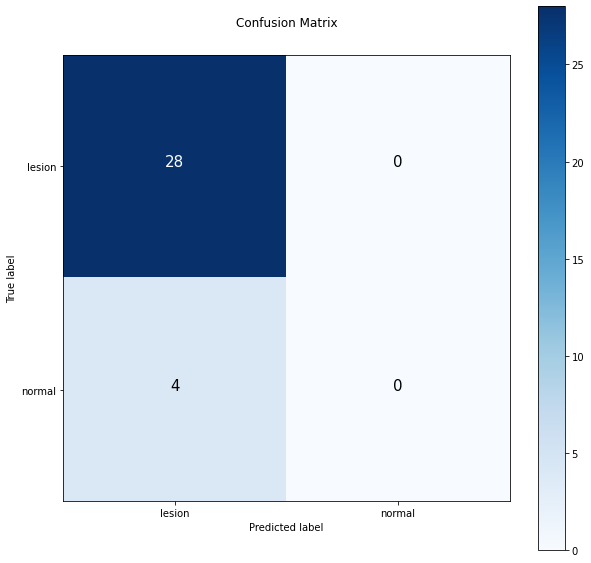

In [80]:
# Plotting confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_pred_knn,
                      classes=class_names,
                      norm=False)

In [81]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_test, y_pred_knn, output_dict=True)
classification_report_dict

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.875,
  'recall': 1.0,
  'f1-score': 0.9333333333333333,
  'support': 28},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4},
 'accuracy': 0.875,
 'macro avg': {'precision': 0.4375,
  'recall': 0.5,
  'f1-score': 0.4666666666666667,
  'support': 32},
 'weighted avg': {'precision': 0.765625,
  'recall': 0.875,
  'f1-score': 0.8166666666666667,
  'support': 32}}

In [82]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'lesion': 0.9333333333333333, 'normal': 0.0}

In [83]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
0,lesion,0.933333
1,normal,0.000000


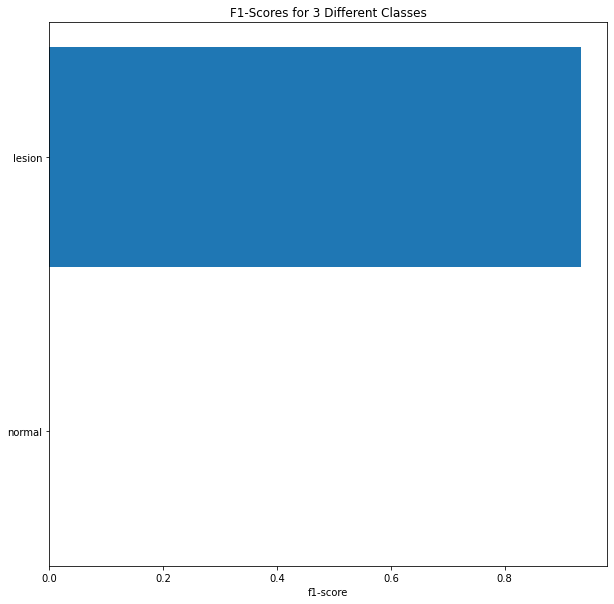

In [84]:
# plotting F1 scores
fig, ax = plt.subplots(figsize=(10, 10))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 3 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(0.1*width, rect.get_y() + rect.get_height()/3,
            f"{width:.2f}",
            ha='center', va='bottom')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Lesion,Normal,accuracy,macro avg,weighted avg
precision,1.000000,0.0,0.875,0.500000,1.000000
recall,0.875000,0.0,0.875,0.437500,0.875000
f1-score,0.933333,0.0,0.875,0.466667,0.933333
support,32.000000,0.0,0.875,32.000000,32.000000


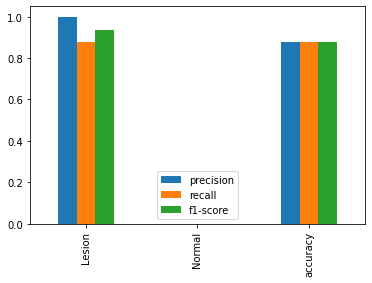

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [86]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import datasets
from IPython import display
import matplotlib.pyplot as plt

target = ['Lesion', 'Normal']

report2 = classification_report(y_pred_knn, y_test, target_names=target, digits=4,  output_dict=True)

display.display(pd.DataFrame(report2))
df = pd.DataFrame(report2)
df.iloc[:3, :3].T.plot(kind='bar')
plt.show()
plt.savefig("stats_KNN.png")

from google.colab import files

df.to_csv('stats_KNN.csv', encoding = 'utf-8-sig') 
files.download('stats_KNN.csv')

In [87]:
# Saving the model
import pickle
filename = '/content/drive/MyDrive/Models_dental/KNN.sav'
pickle.dump(knn, open(filename, 'wb'))

In [88]:
KNN = pickle.load(open('/content/drive/MyDrive/Models_dental/KNN.sav', 'rb'))

In [89]:
def prep_img(img_path):
    IMG_SIZE = (224, 224)
    img = tf.io.read_file(img_path)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, IMG_SIZE)

    return img / 255


def pred_ml_model(img_path, model_name):
    img = prep_img(img_path)
    nx, ny, nrgb = img.shape
    img = np.reshape(img, (1, nx * ny * nrgb))
    pred = model_name.predict(img)
    confidence = model_name.predict_proba(img)
    confidence = confidence.tolist()
    print(confidence[0])
    confidence = round(100 * (max(confidence[0])), 2)
    # return (f'{y_pred_prob[0, ix]:.2%}')

    pred_class = class_names[pred[0]]

    return pred_class, confidence


img_path = "/content/drive/MyDrive/dental/lesion/101.png"
print(pred_ml_model(img_path, knn))

[1.0, 0.0]
('lesion', 100.0)


# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train2, y_train)

DecisionTreeClassifier()

In [91]:
from sklearn.metrics import accuracy_score

y_train_dtc = dtc.predict(x_train2)

training_data_accuracy = accuracy_score(y_train_dtc,y_train)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [92]:
from sklearn.metrics import accuracy_score
y_pred_dtc = dtc.predict(x_test2)
testing_data_accuracy = accuracy_score(y_pred_dtc,y_test)
print('Accuracy score of testing data : ', testing_data_accuracy)
print(classification_report(y_pred_knn,y_test))

Accuracy score of testing data :  0.90625
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.00      0.00      0.00         0

    accuracy                           0.88        32
   macro avg       0.50      0.44      0.47        32
weighted avg       1.00      0.88      0.93        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


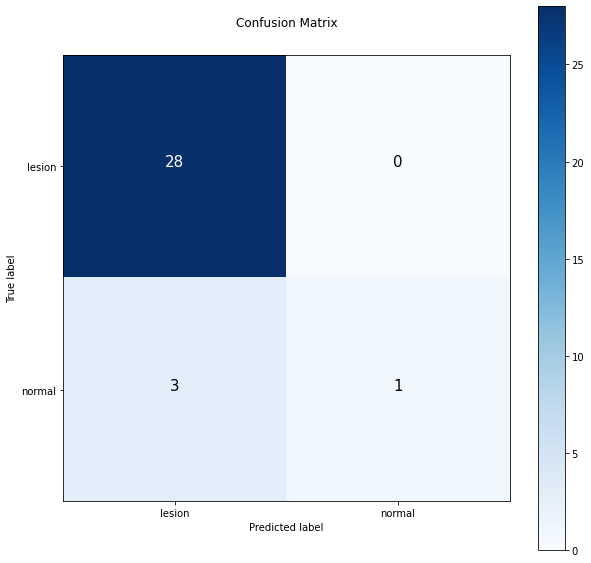

In [93]:
# Plotting confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_pred_dtc,
                      classes=class_names,
                      norm=False)

In [94]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_test, y_pred_dtc, output_dict=True)
classification_report_dict

{'0': {'precision': 0.9032258064516129,
  'recall': 1.0,
  'f1-score': 0.9491525423728813,
  'support': 28},
 '1': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 4},
 'accuracy': 0.90625,
 'macro avg': {'precision': 0.9516129032258065,
  'recall': 0.625,
  'f1-score': 0.6745762711864407,
  'support': 32},
 'weighted avg': {'precision': 0.9153225806451613,
  'recall': 0.90625,
  'f1-score': 0.8805084745762711,
  'support': 32}}

In [95]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'lesion': 0.9491525423728813, 'normal': 0.4}

In [96]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
0,lesion,0.949153
1,normal,0.400000


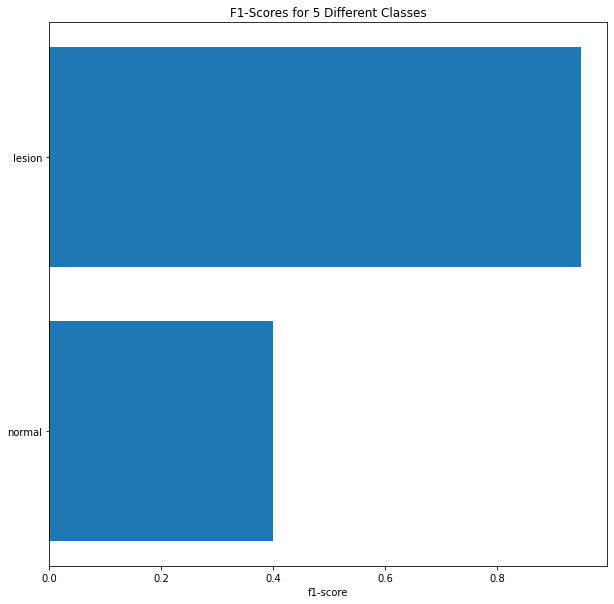

In [97]:
# plotting F1 scores
fig, ax = plt.subplots(figsize=(10, 10))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 5 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(0.1*width, rect.get_y() + rect.get_height()/3,
            f"{width:.2f}",
            ha='center', va='bottom')

,Lesion,Normal,accuracy,macro avg,weighted avg
precision,1.000000,0.25,0.90625,0.625000,0.976562
recall,0.903226,1.00,0.90625,0.951613,0.906250
f1-score,0.949153,0.40,0.90625,0.674576,0.931992
support,31.000000,1.00,0.90625,32.000000,32.000000


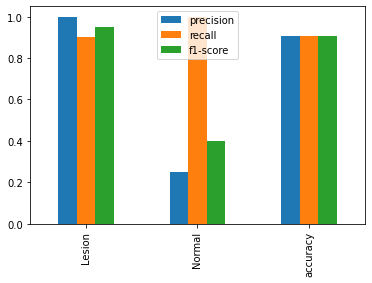

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [99]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import datasets
from IPython import display
import matplotlib.pyplot as plt

target = ['Lesion', 'Normal']

report3 = classification_report(y_pred_dtc, y_test, target_names=target, digits=4,  output_dict=True)

display.display(pd.DataFrame(report3))
df = pd.DataFrame(report3)
df.iloc[:3, :3].T.plot(kind='bar')
plt.show()
plt.savefig("stats_DT.png")

from google.colab import files

df.to_csv('stats_DT.csv', encoding = 'utf-8-sig') 
files.download('stats_DT.csv')

In [100]:
# Saving the model
import pickle
filename = '/content/drive/MyDrive/Models_dental/DTC.sav'
pickle.dump(dtc, open(filename, 'wb'))

In [101]:
dtc = pickle.load(open('/content/drive/MyDrive/Models_dental/DTC.sav', 'rb'))

# SVM

In [102]:
from sklearn import svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(kernel='linear', probability=True)

# training the SVM model with training data
SVM.fit(x_train2, y_train)

SVC(kernel='linear', probability=True)

In [103]:
from sklearn.metrics import accuracy_score

y_train_svm = SVM.predict(x_train2)

training_data_accuracy = accuracy_score(y_train_svm,y_train)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [104]:
from sklearn.metrics import accuracy_score
y_pred_svm = SVM.predict(x_test2)
testing_data_accuracy = accuracy_score(y_pred_svm,y_test)
print('Accuracy score of testing data : ', testing_data_accuracy)
print(classification_report(y_pred_knn,y_test))

Accuracy score of testing data :  0.90625
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.00      0.00      0.00         0

    accuracy                           0.88        32
   macro avg       0.50      0.44      0.47        32
weighted avg       1.00      0.88      0.93        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


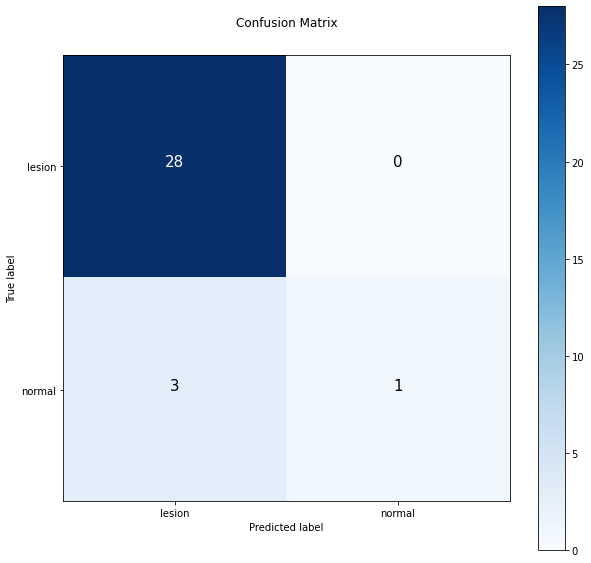

In [105]:
# Plotting confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_pred_svm,
                      classes=class_names,
                      norm=False)

In [106]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_test, y_pred_svm, output_dict=True)
classification_report_dict

{'0': {'precision': 0.9032258064516129,
  'recall': 1.0,
  'f1-score': 0.9491525423728813,
  'support': 28},
 '1': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 4},
 'accuracy': 0.90625,
 'macro avg': {'precision': 0.9516129032258065,
  'recall': 0.625,
  'f1-score': 0.6745762711864407,
  'support': 32},
 'weighted avg': {'precision': 0.9153225806451613,
  'recall': 0.90625,
  'f1-score': 0.8805084745762711,
  'support': 32}}

In [107]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'lesion': 0.9491525423728813, 'normal': 0.4}

In [108]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
0,lesion,0.949153
1,normal,0.400000


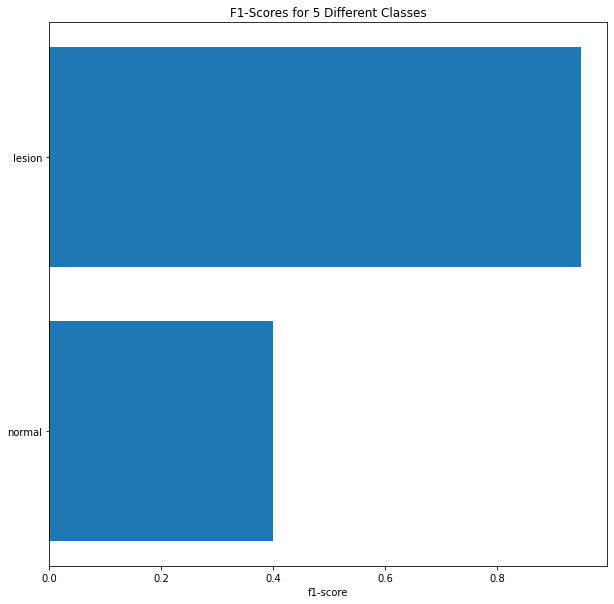

In [109]:
# plotting F1 scores
fig, ax = plt.subplots(figsize=(10, 10))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 5 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(0.1*width, rect.get_y() + rect.get_height()/3,
            f"{width:.2f}",
            ha='center', va='bottom')

,Lesion,Normal,accuracy,macro avg,weighted avg
precision,1.000000,0.25,0.90625,0.625000,0.976562
recall,0.903226,1.00,0.90625,0.951613,0.906250
f1-score,0.949153,0.40,0.90625,0.674576,0.931992
support,31.000000,1.00,0.90625,32.000000,32.000000


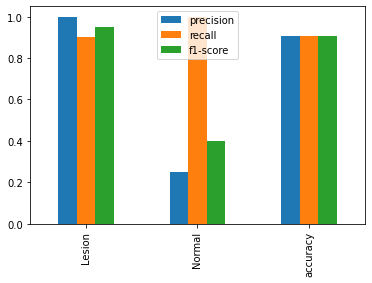

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [110]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import datasets
from IPython import display
import matplotlib.pyplot as plt

target = ['Lesion', 'Normal']

report4 = classification_report(y_pred_svm, y_test, target_names=target, digits=4,  output_dict=True)

display.display(pd.DataFrame(report4))
df = pd.DataFrame(report4)
df.iloc[:3, :3].T.plot(kind='bar')
plt.show()
plt.savefig("stats_SVM.png")

from google.colab import files

df.to_csv('stats_SVM.csv', encoding = 'utf-8-sig') 
files.download('stats_SVM.csv')

In [111]:
# Saving the model
import pickle
filename = '/content/drive/MyDrive/Models_dental/SVM.sav'
pickle.dump(SVM, open(filename, 'wb'))

SVM = pickle.load(open('/content/drive/MyDrive/Models_dental/SVM.sav', 'rb'))

# ANN

In [112]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier()
MLP.fit(x_train2, y_train)

MLPClassifier()

In [113]:
from sklearn.metrics import accuracy_score

y_train_mlp = MLP.predict(x_train2)

training_data_accuracy = accuracy_score(y_train_mlp,y_train)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.11363636363636363


In [114]:
from sklearn.metrics import accuracy_score
y_pred_mlp = MLP.predict(x_test2)
testing_data_accuracy = accuracy_score(y_pred_mlp,y_test)
print('Accuracy score of testing data : ', testing_data_accuracy)
print(classification_report(y_pred_knn,y_test))

Accuracy score of testing data :  0.125
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.00      0.00      0.00         0

    accuracy                           0.88        32
   macro avg       0.50      0.44      0.47        32
weighted avg       1.00      0.88      0.93        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


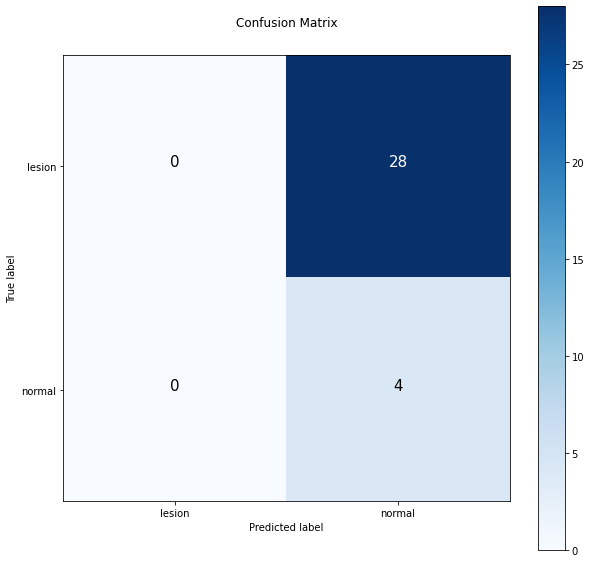

In [115]:
# Plotting confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_pred_mlp,
                      classes=class_names,
                      norm=False)

In [116]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_test, y_pred_mlp, output_dict=True)
classification_report_dict

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 28},
 '1': {'precision': 0.125,
  'recall': 1.0,
  'f1-score': 0.2222222222222222,
  'support': 4},
 'accuracy': 0.125,
 'macro avg': {'precision': 0.0625,
  'recall': 0.5,
  'f1-score': 0.1111111111111111,
  'support': 32},
 'weighted avg': {'precision': 0.015625,
  'recall': 0.125,
  'f1-score': 0.027777777777777776,
  'support': 32}}

In [117]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'lesion': 0.0, 'normal': 0.2222222222222222}

In [118]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
1,normal,0.222222
0,lesion,0.000000


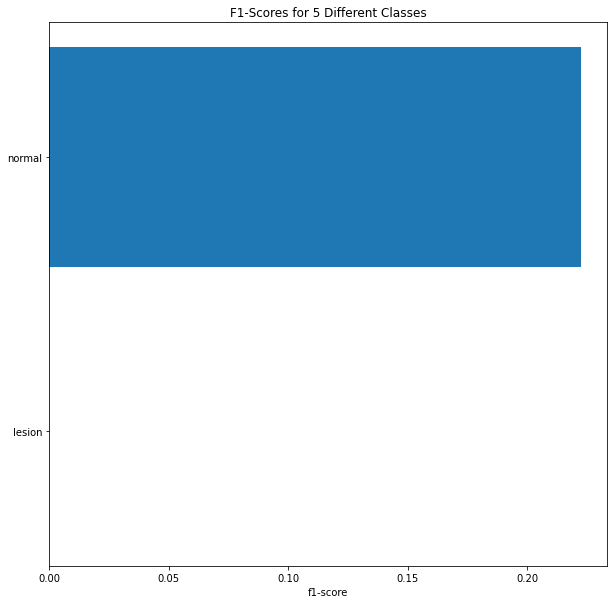

In [119]:
# plotting F1 scores
fig, ax = plt.subplots(figsize=(10, 10))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 5 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(0.1*width, rect.get_y() + rect.get_height()/3,
            f"{width:.2f}",
            ha='center', va='bottom')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Lesion,Normal,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.125,0.500000,1.000000
recall,0.0,0.125000,0.125,0.062500,0.125000
f1-score,0.0,0.222222,0.125,0.111111,0.222222
support,0.0,32.000000,0.125,32.000000,32.000000


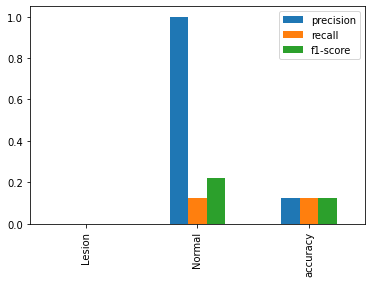

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [120]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import datasets
from IPython import display
import matplotlib.pyplot as plt

target = ['Lesion', 'Normal']


report3 = classification_report(y_pred_mlp, y_test, target_names=target, digits=4,  output_dict=True)

display.display(pd.DataFrame(report3))
df = pd.DataFrame(report3)
df.iloc[:3, :3].T.plot(kind='bar')
plt.show()
plt.savefig("stats_MLP.png")

from google.colab import files

df.to_csv('stats_MLP.csv', encoding = 'utf-8-sig') 
files.download('stats_MLP.csv')

In [121]:
# Saving the model
import pickle
filename = '/content/drive/MyDrive/Models_dental/MLP.sav'
pickle.dump(MLP, open(filename, 'wb'))

MLP = pickle.load(open('/content/drive/MyDrive/Models_dental/MLP.sav', 'rb'))

# Hybrid 1

In [122]:
from pandas.core.indexing import convert_missing_indexer
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y_pred_mlp = MLP.predict(x_test2)
y_pred_svm = SVM.predict(x_test2)
y_pred_knn = knn.predict(x_test2)
y_pred_dtc = dtc.predict(x_test2)

model_1 = knn
model_2 = dtc
model_3 = SVM
model_4 = MLP
model_5 = dtc


cm_SVM = confusion_matrix(y_test, y_pred_svm)
cm_KNN  = confusion_matrix(y_test, y_pred_knn)
cm_DT = confusion_matrix(y_test, y_pred_dtc)
cm_MLP= confusion_matrix(y_test, y_pred_mlp)
cm_CNN = confusion_matrix(y_test, y_pred_dtc)

print(cm_SVM)

[[28  0]
 [ 3  1]]


In [123]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

# estimators.append(('MLP', model_1))
# estimators.append(('RF', model_2))
estimators.append(('SVM', model_3))
estimators.append(('ANN', model_4))
# estimators.append(('DT', model_5))

In [124]:
ensemble = VotingClassifier(estimators,voting='soft')
model_6 = ensemble.fit(x_train2, y_train)
y_pred = ensemble.predict(x_test2)

#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [125]:
from sklearn.metrics import accuracy_score
testing_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy score of testing data : ', testing_data_accuracy)
# print(classification_report(y_pred,y_test))

Accuracy score of testing data :  0.90625


In [126]:
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=None)
results = model_selection.cross_val_score(ensemble, x_train2, y_train, cv=kfold)
hybrid_acc = results.mean()

In [127]:
# Saving the model
import pickle
filename = '/content/drive/MyDrive/Models_dental/Hybrid.sav'
pickle.dump(model_6, open(filename, 'wb'))

model_6 = pickle.load(open('/content/drive/MyDrive/Models_dental/Hybrid.sav', 'rb'))

,Lesion,Normal,accuracy,macro avg,weighted avg
precision,1.000000,0.25,0.90625,0.625000,0.976562
recall,0.903226,1.00,0.90625,0.951613,0.906250
f1-score,0.949153,0.40,0.90625,0.674576,0.931992
support,31.000000,1.00,0.90625,32.000000,32.000000


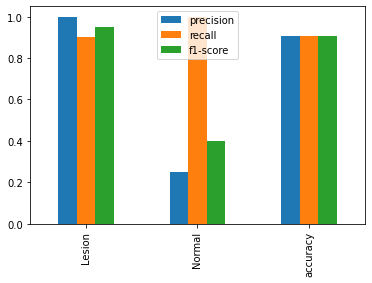

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [129]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import datasets
from IPython import display
import matplotlib.pyplot as plt
target = ['Lesion', 'Normal']

report5 = classification_report(y_pred, y_test, target_names=target, digits=4,  output_dict=True)

display.display(pd.DataFrame(report5))
df = pd.DataFrame(report5)
df.iloc[:3, :3].T.plot(kind='bar')
plt.show()
plt.savefig("stats_Hybrid.png")

from google.colab import files

df.to_csv('stats_Hybrid.csv', encoding = 'utf-8-sig') 
files.download('stats_Hybrid.csv')